In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('letter-recognition.data',header=None)

In [3]:
train_df = df[:1600]
test_df = df[16000:16000+400]

In [4]:
X = train_df.ix[:,1:16].to_numpy() 
y = np.array([ord(l)-ord('A') for l in train_df.ix[:,0].to_numpy()])

In [5]:
from collections import Counter
def counter(arr):
    return Counter(arr).most_common() # 返回出现频率最高的两个数

In [6]:
testX = test_df.ix[:,1:16].to_numpy() 
testy = np.array([ord(l)-ord('A') for l in test_df.ix[:,0].to_numpy()])

In [7]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [8]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

In [9]:
numbers = [*range(26)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

In [10]:
def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-letter26")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.03746 stdev: 0.01167
Best fitness: 0.07562 - size: (26, 42) - species 11 - id 182
Average adjusted fitness: 0.036
Mean genetic distance 2.711, standard deviation 0.234
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 22.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.04229 stdev: 0.01214
Best fitness: 0.08250 - size: (27, 43) - species 30 - id 264
Average adjusted fitness: 0.037
Mean genetic distance 2.769, standard deviation 0.294
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 18.772 sec (20.576 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.04360 stdev: 0.01249
Best fitness: 0.08250 - size: (27, 43) - species 30 - id 264
Average adjusted fitness: 0.031
Mean genetic distance 2.813, standard deviation 0.304
Population of 206 members in 47 species
Total extinctions: 0
Generation time: 18.437 sec

Population's average fitness: 0.05387 stdev: 0.01728
Best fitness: 0.09750 - size: (29, 47) - species 24 - id 3008
Average adjusted fitness: 0.041
Mean genetic distance 3.046, standard deviation 0.390
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 17.647 sec (18.006 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.05342 stdev: 0.01810
Best fitness: 0.09750 - size: (29, 47) - species 24 - id 3008
Average adjusted fitness: 0.043
Mean genetic distance 3.059, standard deviation 0.399
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 18.405 sec (18.015 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.05451 stdev: 0.01853
Best fitness: 0.09750 - size: (29, 47) - species 24 - id 3008
Average adjusted fitness: 0.046
Mean genetic distance 3.070, standard deviation 0.404
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 17.835 sec (17.993 average)

Population's average fitness: 0.05519 stdev: 0.01902
Best fitness: 0.12125 - size: (31, 50) - species 24 - id 6603
Average adjusted fitness: 0.042
Mean genetic distance 3.163, standard deviation 0.566
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 20.857 sec (20.117 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.05516 stdev: 0.01901
Best fitness: 0.12125 - size: (31, 50) - species 24 - id 6603
Average adjusted fitness: 0.036
Mean genetic distance 3.172, standard deviation 0.576
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 20.649 sec (20.233 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.05637 stdev: 0.02102
Best fitness: 0.12375 - size: (32, 51) - species 24 - id 7318
Average adjusted fitness: 0.045
Mean genetic distance 3.154, standard deviation 0.580
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 20.693 sec (20.313 average)

Population's average fitness: 0.06264 stdev: 0.02094
Best fitness: 0.12812 - size: (34, 57) - species 59 - id 8057
Average adjusted fitness: 0.043
Mean genetic distance 3.132, standard deviation 0.537
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 22.775 sec (22.447 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.06215 stdev: 0.02117
Best fitness: 0.12937 - size: (35, 58) - species 59 - id 11360
Average adjusted fitness: 0.036
Mean genetic distance 3.124, standard deviation 0.523
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 24.366 sec (22.642 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.06489 stdev: 0.02297
Best fitness: 0.12937 - size: (35, 58) - species 59 - id 11360
Average adjusted fitness: 0.052
Mean genetic distance 3.102, standard deviation 0.538
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 22.757 sec (22.731 averag

Population's average fitness: 0.07395 stdev: 0.02547
Best fitness: 0.14438 - size: (43, 60) - species 71 - id 14113
Average adjusted fitness: 0.059
Mean genetic distance 3.144, standard deviation 0.551
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 24.137 sec (23.634 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.07160 stdev: 0.02527
Best fitness: 0.14438 - size: (43, 60) - species 71 - id 14113
Average adjusted fitness: 0.050
Mean genetic distance 3.127, standard deviation 0.536
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 24.157 sec (23.688 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.07173 stdev: 0.02677
Best fitness: 0.14438 - size: (43, 60) - species 66 - id 14113
Average adjusted fitness: 0.047
Mean genetic distance 3.092, standard deviation 0.548
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 24.552 sec (23.872 avera

Population's average fitness: 0.07121 stdev: 0.02647
Best fitness: 0.14500 - size: (44, 59) - species 62 - id 18619
Average adjusted fitness: 0.051
Mean genetic distance 2.948, standard deviation 0.540
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 22.681 sec (22.467 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.07334 stdev: 0.02589
Best fitness: 0.14563 - size: (48, 76) - species 51 - id 19471
Average adjusted fitness: 0.051
Mean genetic distance 2.954, standard deviation 0.530
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.279 sec (22.231 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.07458 stdev: 0.02728
Best fitness: 0.14563 - size: (48, 76) - species 51 - id 19471
Average adjusted fitness: 0.053
Mean genetic distance 2.959, standard deviation 0.504
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.306 sec (22.251 ave

Population's average fitness: 0.07589 stdev: 0.02717
Best fitness: 0.15313 - size: (54, 80) - species 78 - id 23268
Average adjusted fitness: 0.062
Mean genetic distance 2.906, standard deviation 0.564
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 22.587 sec (22.383 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.07069 stdev: 0.02831
Best fitness: 0.15313 - size: (54, 80) - species 78 - id 23268
Average adjusted fitness: 0.044
Mean genetic distance 2.907, standard deviation 0.541
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 22.789 sec (22.414 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.07325 stdev: 0.02886
Best fitness: 0.15313 - size: (54, 80) - species 78 - id 23268
Average adjusted fitness: 0.050
Mean genetic distance 2.924, standard deviation 0.580
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.600 sec (22.480 averag

Population's average fitness: 0.07323 stdev: 0.02847
Best fitness: 0.15313 - size: (50, 78) - species 95 - id 27831
Average adjusted fitness: 0.051
Mean genetic distance 3.098, standard deviation 0.613
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 24.712 sec (24.169 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.07325 stdev: 0.02653
Best fitness: 0.15313 - size: (50, 78) - species 95 - id 27831
Average adjusted fitness: 0.042
Mean genetic distance 3.091, standard deviation 0.587
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 24.603 sec (24.216 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.06826 stdev: 0.02795
Best fitness: 0.15313 - size: (50, 78) - species 95 - id 27831
Average adjusted fitness: 0.054
Mean genetic distance 3.081, standard deviation 0.594
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 24.852 sec (24.322 ave

Population's average fitness: 0.07112 stdev: 0.02867
Best fitness: 0.15313 - size: (50, 78) - species 98 - id 27831
Average adjusted fitness: 0.060
Mean genetic distance 2.884, standard deviation 0.471
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.444 sec (24.924 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.07422 stdev: 0.02761
Best fitness: 0.15313 - size: (50, 78) - species 98 - id 27831
Average adjusted fitness: 0.046
Mean genetic distance 2.875, standard deviation 0.490
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 23.892 sec (24.827 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.07078 stdev: 0.02625
Best fitness: 0.15313 - size: (50, 78) - species 98 - id 27831
Average adjusted fitness: 0.046
Mean genetic distance 2.891, standard deviation 0.512
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 24.160 sec (24.762 avera

Population's average fitness: 0.07780 stdev: 0.03101
Best fitness: 0.16500 - size: (56, 84) - species 78 - id 34074
Average adjusted fitness: 0.062
Mean genetic distance 2.850, standard deviation 0.411
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 24.154 sec (24.425 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.08031 stdev: 0.02943
Best fitness: 0.16500 - size: (56, 84) - species 78 - id 34074
Average adjusted fitness: 0.053
Mean genetic distance 2.843, standard deviation 0.425
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 24.050 sec (24.335 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.07915 stdev: 0.02986
Best fitness: 0.16500 - size: (56, 84) - species 78 - id 34074
Average adjusted fitness: 0.067
Mean genetic distance 2.847, standard deviation 0.441
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 24.103 sec (24.301 ave

Population's average fitness: 0.07521 stdev: 0.02960
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.063
Mean genetic distance 2.870, standard deviation 0.469
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.900 sec (24.837 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.07595 stdev: 0.03078
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.058
Mean genetic distance 2.877, standard deviation 0.460
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 24.629 sec (24.800 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.07724 stdev: 0.03070
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.044
Mean genetic distance 2.882, standard deviation 0.468
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 25.051 sec (24.806 

Mean genetic distance 3.000, standard deviation 0.523
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 24.119 sec (24.503 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.07559 stdev: 0.02946
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.054
Mean genetic distance 2.990, standard deviation 0.509
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 24.058 sec (24.482 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.07351 stdev: 0.02894
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.039
Mean genetic distance 2.990, standard deviation 0.507
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 24.259 sec (24.422 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.07374 stdev: 0.02980
Best fitness: 0.16500 - size: (56, 84) - speci

Population's average fitness: 0.07979 stdev: 0.03025
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.046
Mean genetic distance 2.950, standard deviation 0.491
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 24.261 sec (24.712 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.07925 stdev: 0.02999
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.056
Mean genetic distance 2.946, standard deviation 0.496
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 24.530 sec (24.779 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.07761 stdev: 0.03006
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.061
Mean genetic distance 2.920, standard deviation 0.504
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.059 sec (24.701 

Population's average fitness: 0.07391 stdev: 0.02931
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.056
Mean genetic distance 2.786, standard deviation 0.477
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 23.565 sec (23.572 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.07446 stdev: 0.03072
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.055
Mean genetic distance 2.774, standard deviation 0.511
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.698 sec (23.560 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.07844 stdev: 0.02768
Best fitness: 0.16500 - size: (56, 84) - species 115 - id 34074
Average adjusted fitness: 0.067
Mean genetic distance 2.792, standard deviation 0.494
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.463 sec (23.552 ave

Population's average fitness: 0.08152 stdev: 0.03010
Best fitness: 0.16687 - size: (53, 75) - species 113 - id 56545
Average adjusted fitness: 0.049
Mean genetic distance 2.877, standard deviation 0.472
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 24.148 sec (24.281 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.07883 stdev: 0.03088
Best fitness: 0.16687 - size: (53, 75) - species 113 - id 56545
Average adjusted fitness: 0.044
Mean genetic distance 2.888, standard deviation 0.470
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 25.505 sec (24.355 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.08012 stdev: 0.03041
Best fitness: 0.16687 - size: (53, 75) - species 113 - id 56545
Average adjusted fitness: 0.061
Mean genetic distance 2.868, standard deviation 0.476
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 25.137 sec (24.418 

Population's average fitness: 0.07595 stdev: 0.02772
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.051
Mean genetic distance 2.784, standard deviation 0.453
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.005 sec (22.560 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.07746 stdev: 0.02823
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.062
Mean genetic distance 2.804, standard deviation 0.446
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 21.843 sec (22.419 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.07495 stdev: 0.02978
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.067
Mean genetic distance 2.782, standard deviation 0.466
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 21.237 sec (22.205 

Mean genetic distance 2.835, standard deviation 0.536
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 23.242 sec (23.127 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.08028 stdev: 0.03025
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.047
Mean genetic distance 2.835, standard deviation 0.549
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.725 sec (23.252 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.08059 stdev: 0.02991
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.059
Mean genetic distance 2.823, standard deviation 0.565
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 23.075 sec (23.286 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.07708 stdev: 0.02982
Best fitness: 0.16687 - size: (53, 75) - species 

Population's average fitness: 0.07277 stdev: 0.02959
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.041
Mean genetic distance 2.928, standard deviation 0.579
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 25.312 sec (25.045 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.07629 stdev: 0.03110
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.057
Mean genetic distance 2.941, standard deviation 0.552
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 24.836 sec (25.079 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.07687 stdev: 0.02962
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.042
Mean genetic distance 2.931, standard deviation 0.553
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 24.279 sec (25.033 

Mean genetic distance 2.932, standard deviation 0.502
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 23.196 sec (23.233 average)

 ****** Running generation 430 ****** 

Population's average fitness: 0.07719 stdev: 0.03030
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.052
Mean genetic distance 2.954, standard deviation 0.507
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 23.190 sec (23.217 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.07925 stdev: 0.02968
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.066
Mean genetic distance 2.934, standard deviation 0.542
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.661 sec (23.172 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.07877 stdev: 0.02952
Best fitness: 0.16687 - size: (53, 75) - speci

Population's average fitness: 0.07670 stdev: 0.02855
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.055
Mean genetic distance 2.903, standard deviation 0.543
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.017 sec (22.233 average)

 ****** Running generation 454 ****** 

Population's average fitness: 0.07777 stdev: 0.02992
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.059
Mean genetic distance 2.914, standard deviation 0.551
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 22.008 sec (22.139 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.07280 stdev: 0.02850
Best fitness: 0.16687 - size: (53, 75) - species 151 - id 56545
Average adjusted fitness: 0.046
Mean genetic distance 2.935, standard deviation 0.554
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 22.666 sec (22.149 

Mean genetic distance 2.923, standard deviation 0.500
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 20.695 sec (21.653 average)

 ****** Running generation 477 ****** 

Population's average fitness: 0.07365 stdev: 0.03031
Best fitness: 0.16750 - size: (54, 76) - species 151 - id 82994
Average adjusted fitness: 0.066
Mean genetic distance 2.933, standard deviation 0.502
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.999 sec (21.512 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.07597 stdev: 0.03045
Best fitness: 0.16750 - size: (54, 76) - species 151 - id 82994
Average adjusted fitness: 0.048
Mean genetic distance 2.926, standard deviation 0.493
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.274 sec (21.523 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.07572 stdev: 0.02853
Best fitness: 0.16750 - size: (54, 76) - speci

Population's average fitness: 0.07324 stdev: 0.02995
Best fitness: 0.16750 - size: (54, 76) - species 151 - id 82994
Average adjusted fitness: 0.052
Mean genetic distance 2.937, standard deviation 0.527
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 22.307 sec (21.809 average)

 ****** Running generation 501 ****** 

Population's average fitness: 0.07334 stdev: 0.03055
Best fitness: 0.16750 - size: (54, 76) - species 151 - id 82994
Average adjusted fitness: 0.053
Mean genetic distance 2.921, standard deviation 0.528
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 22.397 sec (21.911 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.07615 stdev: 0.02984
Best fitness: 0.16750 - size: (54, 76) - species 151 - id 82994
Average adjusted fitness: 0.053
Mean genetic distance 2.924, standard deviation 0.522
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 21.589 sec (21.830 

Population's average fitness: 0.07588 stdev: 0.02940
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.044
Mean genetic distance 2.838, standard deviation 0.458
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 22.277 sec (22.217 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.07398 stdev: 0.03056
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.052
Mean genetic distance 2.805, standard deviation 0.455
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 21.621 sec (22.138 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.07541 stdev: 0.03102
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.072
Mean genetic distance 2.781, standard deviation 0.505
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 21.327 sec (22.092 

Mean genetic distance 2.813, standard deviation 0.540
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.758 sec (27.734 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.07664 stdev: 0.02977
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.044
Mean genetic distance 2.828, standard deviation 0.519
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.689 sec (26.740 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.07733 stdev: 0.02979
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.050
Mean genetic distance 2.825, standard deviation 0.533
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 24.479 sec (25.421 average)

 ****** Running generation 550 ****** 

Population's average fitness: 0.07617 stdev: 0.03092
Best fitness: 0.17563 - size: (58, 86) - species 

Population's average fitness: 0.07199 stdev: 0.02885
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.045
Mean genetic distance 2.799, standard deviation 0.519
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 22.925 sec (21.529 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.07335 stdev: 0.02795
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.041
Mean genetic distance 2.798, standard deviation 0.534
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.994 sec (22.306 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.07573 stdev: 0.03059
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.047
Mean genetic distance 2.816, standard deviation 0.525
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 24.483 sec (22.681 ave

Population's average fitness: 0.07772 stdev: 0.02990
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.047
Mean genetic distance 2.871, standard deviation 0.463
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.081 sec (20.507 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.07829 stdev: 0.02934
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.041
Mean genetic distance 2.862, standard deviation 0.487
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 19.945 sec (20.430 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.07867 stdev: 0.02951
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.057
Mean genetic distance 2.852, standard deviation 0.477
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 19.539 sec (20.167 

Mean genetic distance 2.863, standard deviation 0.527
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 23.009 sec (24.260 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.07906 stdev: 0.02896
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.056
Mean genetic distance 2.847, standard deviation 0.494
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.077 sec (24.661 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.07632 stdev: 0.02988
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.068
Mean genetic distance 2.843, standard deviation 0.493
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 24.512 sec (24.526 average)

 ****** Running generation 621 ****** 

Population's average fitness: 0.07739 stdev: 0.02917
Best fitness: 0.17563 - size: (58, 86) - specie

Population's average fitness: 0.08151 stdev: 0.02966
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.053
Mean genetic distance 2.740, standard deviation 0.544
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 20.553 sec (21.005 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.08214 stdev: 0.03001
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.061
Mean genetic distance 2.753, standard deviation 0.500
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 20.898 sec (20.888 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.07949 stdev: 0.03095
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.065
Mean genetic distance 2.771, standard deviation 0.472
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.940 sec (21.163 ave

Population's average fitness: 0.07866 stdev: 0.03071
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.064
Mean genetic distance 2.761, standard deviation 0.500
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 20.087 sec (20.105 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.07446 stdev: 0.02993
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.062
Mean genetic distance 2.769, standard deviation 0.484
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 20.629 sec (20.169 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.07618 stdev: 0.03098
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.058
Mean genetic distance 2.777, standard deviation 0.474
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 20.462 sec (20.179 ave

Mean genetic distance 2.838, standard deviation 0.415
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 21.466 sec (21.656 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.07872 stdev: 0.03076
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.068
Mean genetic distance 2.837, standard deviation 0.422
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 20.963 sec (21.574 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.07970 stdev: 0.03082
Best fitness: 0.17563 - size: (58, 86) - species 115 - id 91455
Average adjusted fitness: 0.049
Mean genetic distance 2.819, standard deviation 0.436
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 20.829 sec (21.506 average)

 ****** Running generation 692 ****** 

Population's average fitness: 0.08112 stdev: 0.03071
Best fitness: 0.17563 - size: (58, 86) - speci

Population's average fitness: 0.07622 stdev: 0.03092
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.065
Mean genetic distance 2.790, standard deviation 0.469
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 24.548 sec (22.668 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.07791 stdev: 0.03078
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.045
Mean genetic distance 2.789, standard deviation 0.490
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 21.455 sec (22.610 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.08086 stdev: 0.03035
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.055
Mean genetic distance 2.790, standard deviation 0.455
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 21.096 sec (22.575 

Mean genetic distance 2.738, standard deviation 0.506
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.896 sec (23.327 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.08217 stdev: 0.03149
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.068
Mean genetic distance 2.727, standard deviation 0.518
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.092 sec (23.928 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.08019 stdev: 0.03068
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.051
Mean genetic distance 2.744, standard deviation 0.490
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 24.589 sec (24.250 average)

 ****** Running generation 739 ****** 

Population's average fitness: 0.07935 stdev: 0.03111
Best fitness: 0.17625 - size: (59, 88) - specie

Population's average fitness: 0.08274 stdev: 0.03277
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.059
Mean genetic distance 2.802, standard deviation 0.476
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 35.329 sec (30.431 average)

 ****** Running generation 761 ****** 

Population's average fitness: 0.08080 stdev: 0.03193
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.048
Mean genetic distance 2.792, standard deviation 0.490
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 34.189 sec (31.065 average)

 ****** Running generation 762 ****** 

Population's average fitness: 0.07806 stdev: 0.03102
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.053
Mean genetic distance 2.803, standard deviation 0.464
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 27.232 sec (30.926 

Mean genetic distance 2.772, standard deviation 0.497
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 26.763 sec (29.566 average)

 ****** Running generation 784 ****** 

Population's average fitness: 0.07719 stdev: 0.03050
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.057
Mean genetic distance 2.765, standard deviation 0.476
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 27.116 sec (29.345 average)

 ****** Running generation 785 ****** 

Population's average fitness: 0.07568 stdev: 0.03221
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.059
Mean genetic distance 2.731, standard deviation 0.528
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 27.537 sec (29.059 average)

 ****** Running generation 786 ****** 

Population's average fitness: 0.07949 stdev: 0.02959
Best fitness: 0.17625 - size: (59, 88) - specie

Population's average fitness: 0.08207 stdev: 0.03282
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.049
Mean genetic distance 2.821, standard deviation 0.443
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 25.072 sec (27.480 average)

 ****** Running generation 808 ****** 

Population's average fitness: 0.08512 stdev: 0.03261
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.053
Mean genetic distance 2.824, standard deviation 0.437
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 25.373 sec (27.349 average)

 ****** Running generation 809 ****** 

Population's average fitness: 0.08412 stdev: 0.03149
Best fitness: 0.17625 - size: (59, 88) - species 115 - id 123576
Average adjusted fitness: 0.050
Mean genetic distance 2.838, standard deviation 0.416
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.996 sec (26.5

Mean genetic distance 2.717, standard deviation 0.552
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 33.322 sec (33.499 average)

 ****** Running generation 831 ****** 

Population's average fitness: 0.08323 stdev: 0.03052
Best fitness: 0.17625 - size: (59, 88) - species 267 - id 123576
Average adjusted fitness: 0.062
Mean genetic distance 2.687, standard deviation 0.593
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 36.570 sec (33.630 average)

 ****** Running generation 832 ****** 

Population's average fitness: 0.08235 stdev: 0.03060
Best fitness: 0.17625 - size: (59, 88) - species 267 - id 123576
Average adjusted fitness: 0.068
Mean genetic distance 2.704, standard deviation 0.576
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 36.587 sec (34.074 average)

 ****** Running generation 833 ****** 

Population's average fitness: 0.07891 stdev: 0.02901
Best fitness: 0.17625 - size: (59, 88) - specie

Population's average fitness: 0.08201 stdev: 0.03100
Best fitness: 0.18125 - size: (61, 90) - species 267 - id 149705
Average adjusted fitness: 0.070
Mean genetic distance 2.741, standard deviation 0.462
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.331 sec (43.886 average)

 ****** Running generation 855 ****** 

Population's average fitness: 0.07864 stdev: 0.03110
Best fitness: 0.18125 - size: (61, 90) - species 267 - id 149705
Average adjusted fitness: 0.046
Mean genetic distance 2.762, standard deviation 0.441
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 30.486 sec (42.745 average)

 ****** Running generation 856 ****** 

Population's average fitness: 0.08245 stdev: 0.03197
Best fitness: 0.18125 - size: (61, 90) - species 267 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.753, standard deviation 0.466
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 29.673 sec (40.788 

Mean genetic distance 2.515, standard deviation 0.409
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 31.090 sec (31.314 average)

 ****** Running generation 878 ****** 

Population's average fitness: 0.07952 stdev: 0.03203
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.514, standard deviation 0.396
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 31.678 sec (31.455 average)

 ****** Running generation 879 ****** 

Population's average fitness: 0.08357 stdev: 0.03089
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.068
Mean genetic distance 2.531, standard deviation 0.401
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 34.044 sec (31.707 average)

 ****** Running generation 880 ****** 

Population's average fitness: 0.08106 stdev: 0.03043
Best fitness: 0.18125 - size: (61, 90) - specie

Population's average fitness: 0.07655 stdev: 0.03114
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.066
Mean genetic distance 2.623, standard deviation 0.424
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 28.337 sec (26.757 average)

 ****** Running generation 902 ****** 

Population's average fitness: 0.07650 stdev: 0.03024
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.628, standard deviation 0.406
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.172 sec (26.656 average)

 ****** Running generation 903 ****** 

Population's average fitness: 0.07852 stdev: 0.03082
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.041
Mean genetic distance 2.620, standard deviation 0.389
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.334 sec (26.364 

Mean genetic distance 2.726, standard deviation 0.416
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 29.665 sec (30.326 average)

 ****** Running generation 925 ****** 

Population's average fitness: 0.08842 stdev: 0.03110
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.723, standard deviation 0.424
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 31.172 sec (30.314 average)

 ****** Running generation 926 ****** 

Population's average fitness: 0.08438 stdev: 0.03240
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.731, standard deviation 0.439
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 30.813 sec (30.055 average)

 ****** Running generation 927 ****** 

Population's average fitness: 0.08682 stdev: 0.03061
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08308 stdev: 0.03031
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.722, standard deviation 0.414
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 22.565 sec (23.095 average)

 ****** Running generation 949 ****** 

Population's average fitness: 0.08038 stdev: 0.03140
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.723, standard deviation 0.405
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 23.148 sec (22.877 average)

 ****** Running generation 950 ****** 

Population's average fitness: 0.08141 stdev: 0.03298
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.048
Mean genetic distance 2.732, standard deviation 0.410
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 23.044 sec (22.8

Mean genetic distance 2.630, standard deviation 0.471
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 23.569 sec (25.345 average)

 ****** Running generation 972 ****** 

Population's average fitness: 0.08085 stdev: 0.03010
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.642, standard deviation 0.447
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 24.543 sec (25.361 average)

 ****** Running generation 973 ****** 

Population's average fitness: 0.08371 stdev: 0.03195
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.064
Mean genetic distance 2.591, standard deviation 0.440
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 24.182 sec (25.384 average)

 ****** Running generation 974 ****** 

Population's average fitness: 0.08192 stdev: 0.03299
Best fitness: 0.18125 - size: (61, 90) - specie

Population's average fitness: 0.07980 stdev: 0.02911
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.585, standard deviation 0.398
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 24.676 sec (24.896 average)

 ****** Running generation 996 ****** 

Population's average fitness: 0.07865 stdev: 0.03017
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.611, standard deviation 0.388
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 24.332 sec (24.911 average)

 ****** Running generation 997 ****** 

Population's average fitness: 0.07787 stdev: 0.03120
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.645, standard deviation 0.371
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 24.383 sec (24.858 

Mean genetic distance 2.610, standard deviation 0.367
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.446 sec (24.306 average)

 ****** Running generation 1019 ****** 

Population's average fitness: 0.08276 stdev: 0.03199
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.630, standard deviation 0.406
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.232 sec (24.397 average)

 ****** Running generation 1020 ****** 

Population's average fitness: 0.08258 stdev: 0.03084
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.598, standard deviation 0.422
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.567 sec (24.500 average)

 ****** Running generation 1021 ****** 

Population's average fitness: 0.08470 stdev: 0.03392
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.08169 stdev: 0.03139
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.063
Mean genetic distance 2.621, standard deviation 0.402
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.810 sec (24.582 average)

 ****** Running generation 1043 ****** 

Population's average fitness: 0.08330 stdev: 0.03006
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.653, standard deviation 0.379
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 33.020 sec (25.482 average)

 ****** Running generation 1044 ****** 

Population's average fitness: 0.08138 stdev: 0.03110
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.656, standard deviation 0.395
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 28.198 sec (25.

Mean genetic distance 2.594, standard deviation 0.434
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 30.360 sec (25.265 average)

 ****** Running generation 1066 ****** 

Population's average fitness: 0.08748 stdev: 0.03360
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.594, standard deviation 0.425
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 23.696 sec (25.248 average)

 ****** Running generation 1067 ****** 

Population's average fitness: 0.08425 stdev: 0.03265
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.611, standard deviation 0.423
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.781 sec (25.591 average)

 ****** Running generation 1068 ****** 

Population's average fitness: 0.08716 stdev: 0.03107
Best fitness: 0.18125 - size: (61, 90) - sp

Population's average fitness: 0.08785 stdev: 0.03359
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.065
Mean genetic distance 2.639, standard deviation 0.427
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 30.675 sec (31.146 average)

 ****** Running generation 1090 ****** 

Population's average fitness: 0.08840 stdev: 0.03267
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.628, standard deviation 0.434
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 30.447 sec (30.897 average)

 ****** Running generation 1091 ****** 

Population's average fitness: 0.08648 stdev: 0.03210
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.619, standard deviation 0.428
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 31.742 sec (29.

Mean genetic distance 2.573, standard deviation 0.446
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 33.704 sec (33.810 average)

 ****** Running generation 1113 ****** 

Population's average fitness: 0.08348 stdev: 0.03273
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.571, standard deviation 0.433
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 33.936 sec (33.994 average)

 ****** Running generation 1114 ****** 

Population's average fitness: 0.08808 stdev: 0.03170
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.078
Mean genetic distance 2.589, standard deviation 0.447
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 33.070 sec (34.139 average)

 ****** Running generation 1115 ****** 

Population's average fitness: 0.08590 stdev: 0.03216
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08198 stdev: 0.03290
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.069
Mean genetic distance 2.729, standard deviation 0.424
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 34.616 sec (33.806 average)

 ****** Running generation 1137 ****** 

Population's average fitness: 0.08113 stdev: 0.03260
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.061
Mean genetic distance 2.725, standard deviation 0.437
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 35.758 sec (34.143 average)

 ****** Running generation 1138 ****** 

Population's average fitness: 0.08064 stdev: 0.03173
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.060
Mean genetic distance 2.735, standard deviation 0.419
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 33.131 sec (33

Mean genetic distance 2.724, standard deviation 0.428
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 53.607 sec (46.639 average)

 ****** Running generation 1160 ****** 

Population's average fitness: 0.08407 stdev: 0.03217
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.061
Mean genetic distance 2.728, standard deviation 0.432
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 42.013 sec (46.920 average)

 ****** Running generation 1161 ****** 

Population's average fitness: 0.08346 stdev: 0.03253
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.663, standard deviation 0.464
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 44.314 sec (48.216 average)

 ****** Running generation 1162 ****** 

Population's average fitness: 0.08776 stdev: 0.03164
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08323 stdev: 0.03238
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.614, standard deviation 0.420
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 41.362 sec (44.949 average)

 ****** Running generation 1184 ****** 

Population's average fitness: 0.07927 stdev: 0.03085
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.611, standard deviation 0.426
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 40.371 sec (44.598 average)

 ****** Running generation 1185 ****** 

Population's average fitness: 0.07964 stdev: 0.02938
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.614, standard deviation 0.418
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 42.330 sec (44.26

Mean genetic distance 2.673, standard deviation 0.372
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 33.880 sec (36.880 average)

 ****** Running generation 1207 ****** 

Population's average fitness: 0.07579 stdev: 0.03129
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.043
Mean genetic distance 2.656, standard deviation 0.396
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 30.604 sec (34.702 average)

 ****** Running generation 1208 ****** 

Population's average fitness: 0.07513 stdev: 0.03254
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.048
Mean genetic distance 2.633, standard deviation 0.397
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 36.072 sec (33.950 average)

 ****** Running generation 1209 ****** 

Population's average fitness: 0.08059 stdev: 0.03266
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.07861 stdev: 0.03033
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.555, standard deviation 0.373
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 29.346 sec (30.230 average)

 ****** Running generation 1231 ****** 

Population's average fitness: 0.07933 stdev: 0.03133
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.575, standard deviation 0.379
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 30.990 sec (30.262 average)

 ****** Running generation 1232 ****** 

Population's average fitness: 0.07928 stdev: 0.02984
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.060
Mean genetic distance 2.587, standard deviation 0.382
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 28.652 sec (30.14

Mean genetic distance 2.692, standard deviation 0.436
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 32.923 sec (33.116 average)

 ****** Running generation 1254 ****** 

Population's average fitness: 0.08284 stdev: 0.03123
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.043
Mean genetic distance 2.685, standard deviation 0.428
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 38.275 sec (33.076 average)

 ****** Running generation 1255 ****** 

Population's average fitness: 0.08164 stdev: 0.03189
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.045
Mean genetic distance 2.696, standard deviation 0.418
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 28.485 sec (32.502 average)

 ****** Running generation 1256 ****** 

Population's average fitness: 0.08048 stdev: 0.03409
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.07945 stdev: 0.03020
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.063
Mean genetic distance 2.574, standard deviation 0.420
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 28.864 sec (29.251 average)

 ****** Running generation 1278 ****** 

Population's average fitness: 0.07960 stdev: 0.03184
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.542, standard deviation 0.433
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 31.410 sec (29.606 average)

 ****** Running generation 1279 ****** 

Population's average fitness: 0.08102 stdev: 0.03239
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.529, standard deviation 0.439
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 29.993 sec (29.59

Mean genetic distance 2.644, standard deviation 0.426
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.945 sec (30.435 average)

 ****** Running generation 1301 ****** 

Population's average fitness: 0.07745 stdev: 0.03279
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.651, standard deviation 0.407
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 29.709 sec (30.338 average)

 ****** Running generation 1302 ****** 

Population's average fitness: 0.07937 stdev: 0.03221
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.061
Mean genetic distance 2.643, standard deviation 0.412
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 29.407 sec (30.282 average)

 ****** Running generation 1303 ****** 

Population's average fitness: 0.07824 stdev: 0.03119
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.08003 stdev: 0.03122
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.623, standard deviation 0.366
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 28.065 sec (28.273 average)

 ****** Running generation 1325 ****** 

Population's average fitness: 0.08052 stdev: 0.03247
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.062
Mean genetic distance 2.605, standard deviation 0.394
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 27.915 sec (28.294 average)

 ****** Running generation 1326 ****** 

Population's average fitness: 0.07939 stdev: 0.03116
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.570, standard deviation 0.415
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.697 sec (28

Mean genetic distance 2.631, standard deviation 0.426
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 27.234 sec (28.260 average)

 ****** Running generation 1348 ****** 

Population's average fitness: 0.07698 stdev: 0.03193
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.048
Mean genetic distance 2.622, standard deviation 0.433
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 27.475 sec (28.275 average)

 ****** Running generation 1349 ****** 

Population's average fitness: 0.08043 stdev: 0.03081
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.619, standard deviation 0.425
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 28.327 sec (28.320 average)

 ****** Running generation 1350 ****** 

Population's average fitness: 0.08131 stdev: 0.03245
Best fitness: 0.18125 - size: (61, 90) - s

Population's average fitness: 0.07815 stdev: 0.03078
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.046
Mean genetic distance 2.551, standard deviation 0.436
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.227 sec (29.349 average)

 ****** Running generation 1372 ****** 

Population's average fitness: 0.08249 stdev: 0.03099
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.554, standard deviation 0.433
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 27.460 sec (28.423 average)

 ****** Running generation 1373 ****** 

Population's average fitness: 0.07935 stdev: 0.03140
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.045
Mean genetic distance 2.588, standard deviation 0.422
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 28.407 sec (28.08

Mean genetic distance 2.516, standard deviation 0.367
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 27.805 sec (27.086 average)

 ****** Running generation 1395 ****** 

Population's average fitness: 0.07827 stdev: 0.03108
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.048
Mean genetic distance 2.491, standard deviation 0.381
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 29.072 sec (27.188 average)

 ****** Running generation 1396 ****** 

Population's average fitness: 0.08204 stdev: 0.03111
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.067
Mean genetic distance 2.490, standard deviation 0.385
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.154 sec (27.346 average)

 ****** Running generation 1397 ****** 

Population's average fitness: 0.08058 stdev: 0.03209
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.07892 stdev: 0.03112
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.070
Mean genetic distance 2.710, standard deviation 0.404
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 27.503 sec (27.362 average)

 ****** Running generation 1419 ****** 

Population's average fitness: 0.07842 stdev: 0.03115
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.061
Mean genetic distance 2.696, standard deviation 0.413
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 27.689 sec (27.405 average)

 ****** Running generation 1420 ****** 

Population's average fitness: 0.07890 stdev: 0.03069
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.702, standard deviation 0.402
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 29.578 sec (27

Mean genetic distance 2.734, standard deviation 0.394
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 26.776 sec (26.565 average)

 ****** Running generation 1442 ****** 

Population's average fitness: 0.07812 stdev: 0.03242
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.043
Mean genetic distance 2.759, standard deviation 0.399
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 30.184 sec (27.041 average)

 ****** Running generation 1443 ****** 

Population's average fitness: 0.07781 stdev: 0.03191
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.765, standard deviation 0.403
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 36.635 sec (28.080 average)

 ****** Running generation 1444 ****** 

Population's average fitness: 0.07721 stdev: 0.03327
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.07654 stdev: 0.03269
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.635, standard deviation 0.450
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 26.844 sec (26.553 average)

 ****** Running generation 1466 ****** 

Population's average fitness: 0.08154 stdev: 0.03222
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.069
Mean genetic distance 2.625, standard deviation 0.474
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 26.532 sec (26.563 average)

 ****** Running generation 1467 ****** 

Population's average fitness: 0.08345 stdev: 0.03011
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.629, standard deviation 0.451
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 25.987 sec (26.54

Mean genetic distance 2.555, standard deviation 0.402
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 27.054 sec (27.080 average)

 ****** Running generation 1489 ****** 

Population's average fitness: 0.08084 stdev: 0.03135
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.546, standard deviation 0.426
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 26.742 sec (27.095 average)

 ****** Running generation 1490 ****** 

Population's average fitness: 0.08201 stdev: 0.03062
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.548, standard deviation 0.407
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 26.646 sec (27.072 average)

 ****** Running generation 1491 ****** 

Population's average fitness: 0.08209 stdev: 0.03269
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08643 stdev: 0.03178
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.072
Mean genetic distance 2.728, standard deviation 0.443
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 26.071 sec (25.336 average)

 ****** Running generation 1513 ****** 

Population's average fitness: 0.08405 stdev: 0.03217
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.720, standard deviation 0.464
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 25.871 sec (25.518 average)

 ****** Running generation 1514 ****** 

Population's average fitness: 0.08660 stdev: 0.03113
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.746, standard deviation 0.441
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 26.133 sec (25.58

Mean genetic distance 2.685, standard deviation 0.424
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 26.276 sec (26.510 average)

 ****** Running generation 1536 ****** 

Population's average fitness: 0.08315 stdev: 0.03316
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.689, standard deviation 0.415
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 26.644 sec (26.528 average)

 ****** Running generation 1537 ****** 

Population's average fitness: 0.08267 stdev: 0.03337
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.648, standard deviation 0.443
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 25.244 sec (26.420 average)

 ****** Running generation 1538 ****** 

Population's average fitness: 0.08404 stdev: 0.03228
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08194 stdev: 0.03257
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.063
Mean genetic distance 2.744, standard deviation 0.445
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.414 sec (26.277 average)

 ****** Running generation 1560 ****** 

Population's average fitness: 0.08505 stdev: 0.03292
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.749, standard deviation 0.446
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.700 sec (26.384 average)

 ****** Running generation 1561 ****** 

Population's average fitness: 0.08315 stdev: 0.03229
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.073
Mean genetic distance 2.738, standard deviation 0.465
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 26.195 sec (26

Mean genetic distance 2.645, standard deviation 0.456
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.543 sec (26.418 average)

 ****** Running generation 1583 ****** 

Population's average fitness: 0.08056 stdev: 0.03261
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.638, standard deviation 0.465
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.760 sec (26.490 average)

 ****** Running generation 1584 ****** 

Population's average fitness: 0.08336 stdev: 0.03255
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.047
Mean genetic distance 2.684, standard deviation 0.447
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 26.748 sec (26.472 average)

 ****** Running generation 1585 ****** 

Population's average fitness: 0.08275 stdev: 0.03259
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08038 stdev: 0.03202
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.545, standard deviation 0.477
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 24.239 sec (24.841 average)

 ****** Running generation 1607 ****** 

Population's average fitness: 0.08013 stdev: 0.03166
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.597, standard deviation 0.456
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 25.526 sec (24.893 average)

 ****** Running generation 1608 ****** 

Population's average fitness: 0.08228 stdev: 0.03019
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.048
Mean genetic distance 2.620, standard deviation 0.428
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 26.984 sec (25.07

Mean genetic distance 2.681, standard deviation 0.404
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 28.257 sec (28.175 average)

 ****** Running generation 1630 ****** 

Population's average fitness: 0.07812 stdev: 0.03249
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.697, standard deviation 0.369
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 29.969 sec (28.352 average)

 ****** Running generation 1631 ****** 

Population's average fitness: 0.08105 stdev: 0.03297
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.060
Mean genetic distance 2.677, standard deviation 0.383
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 29.144 sec (28.390 average)

 ****** Running generation 1632 ****** 

Population's average fitness: 0.08313 stdev: 0.03312
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.08486 stdev: 0.03233
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.645, standard deviation 0.427
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.326 sec (28.040 average)

 ****** Running generation 1654 ****** 

Population's average fitness: 0.08460 stdev: 0.03313
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.070
Mean genetic distance 2.686, standard deviation 0.424
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.917 sec (27.903 average)

 ****** Running generation 1655 ****** 

Population's average fitness: 0.08624 stdev: 0.03169
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.690, standard deviation 0.437
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.981 sec (27.

Mean genetic distance 2.571, standard deviation 0.430
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 26.532 sec (26.739 average)

 ****** Running generation 1677 ****** 

Population's average fitness: 0.08369 stdev: 0.03159
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.610, standard deviation 0.436
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 25.089 sec (26.495 average)

 ****** Running generation 1678 ****** 

Population's average fitness: 0.08351 stdev: 0.03319
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.067
Mean genetic distance 2.603, standard deviation 0.441
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 25.645 sec (26.309 average)

 ****** Running generation 1679 ****** 

Population's average fitness: 0.08499 stdev: 0.03249
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08312 stdev: 0.03127
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.076
Mean genetic distance 2.585, standard deviation 0.384
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 25.246 sec (26.173 average)

 ****** Running generation 1701 ****** 

Population's average fitness: 0.08371 stdev: 0.03177
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.581, standard deviation 0.424
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 25.170 sec (26.137 average)

 ****** Running generation 1702 ****** 

Population's average fitness: 0.08584 stdev: 0.03154
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.635, standard deviation 0.404
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 25.578 sec (26.04

Mean genetic distance 2.740, standard deviation 0.434
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 24.945 sec (24.906 average)

 ****** Running generation 1724 ****** 

Population's average fitness: 0.08059 stdev: 0.03097
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.760, standard deviation 0.417
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 24.572 sec (24.864 average)

 ****** Running generation 1725 ****** 

Population's average fitness: 0.07983 stdev: 0.03257
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.061
Mean genetic distance 2.736, standard deviation 0.418
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.229 sec (24.881 average)

 ****** Running generation 1726 ****** 

Population's average fitness: 0.08379 stdev: 0.03260
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08364 stdev: 0.03191
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.066
Mean genetic distance 2.696, standard deviation 0.437
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 25.699 sec (25.516 average)

 ****** Running generation 1748 ****** 

Population's average fitness: 0.08443 stdev: 0.03340
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.684, standard deviation 0.442
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 25.338 sec (25.493 average)

 ****** Running generation 1749 ****** 

Population's average fitness: 0.08501 stdev: 0.03392
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.062
Mean genetic distance 2.724, standard deviation 0.423
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 26.365 sec (25

Mean genetic distance 2.658, standard deviation 0.446
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 25.492 sec (26.713 average)

 ****** Running generation 1771 ****** 

Population's average fitness: 0.08099 stdev: 0.03129
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.635, standard deviation 0.427
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.879 sec (26.600 average)

 ****** Running generation 1772 ****** 

Population's average fitness: 0.07982 stdev: 0.03325
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.636, standard deviation 0.437
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 25.965 sec (26.451 average)

 ****** Running generation 1773 ****** 

Population's average fitness: 0.07781 stdev: 0.03189
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08329 stdev: 0.03075
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.074
Mean genetic distance 2.597, standard deviation 0.426
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.112 sec (26.264 average)

 ****** Running generation 1795 ****** 

Population's average fitness: 0.08028 stdev: 0.03171
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.560, standard deviation 0.462
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 26.861 sec (26.302 average)

 ****** Running generation 1796 ****** 

Population's average fitness: 0.07860 stdev: 0.03281
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.588, standard deviation 0.416
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 26.814 sec (26.39

Mean genetic distance 2.480, standard deviation 0.413
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.577 sec (26.658 average)

 ****** Running generation 1818 ****** 

Population's average fitness: 0.07689 stdev: 0.02942
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.077
Mean genetic distance 2.539, standard deviation 0.444
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 26.322 sec (26.596 average)

 ****** Running generation 1819 ****** 

Population's average fitness: 0.07355 stdev: 0.02962
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.621, standard deviation 0.416
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 26.609 sec (26.631 average)

 ****** Running generation 1820 ****** 

Population's average fitness: 0.07684 stdev: 0.02932
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08220 stdev: 0.03316
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.066
Mean genetic distance 2.791, standard deviation 0.420
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 25.805 sec (26.046 average)

 ****** Running generation 1842 ****** 

Population's average fitness: 0.07889 stdev: 0.03108
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.046
Mean genetic distance 2.747, standard deviation 0.441
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 25.697 sec (26.053 average)

 ****** Running generation 1843 ****** 

Population's average fitness: 0.08228 stdev: 0.03129
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.763, standard deviation 0.417
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.313 sec (26

Mean genetic distance 2.617, standard deviation 0.431
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 25.753 sec (25.890 average)

 ****** Running generation 1865 ****** 

Population's average fitness: 0.07810 stdev: 0.03021
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.047
Mean genetic distance 2.536, standard deviation 0.452
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.006 sec (25.930 average)

 ****** Running generation 1866 ****** 

Population's average fitness: 0.07638 stdev: 0.03040
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.042
Mean genetic distance 2.524, standard deviation 0.452
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.707 sec (26.048 average)

 ****** Running generation 1867 ****** 

Population's average fitness: 0.07744 stdev: 0.03084
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08157 stdev: 0.03234
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.689, standard deviation 0.449
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 25.895 sec (26.129 average)

 ****** Running generation 1889 ****** 

Population's average fitness: 0.08109 stdev: 0.03104
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.062
Mean genetic distance 2.720, standard deviation 0.457
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 26.263 sec (26.120 average)

 ****** Running generation 1890 ****** 

Population's average fitness: 0.07483 stdev: 0.03112
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.700, standard deviation 0.494
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 26.428 sec (26.10

Mean genetic distance 2.735, standard deviation 0.444
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 24.893 sec (25.529 average)

 ****** Running generation 1912 ****** 

Population's average fitness: 0.08618 stdev: 0.03294
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.069
Mean genetic distance 2.745, standard deviation 0.447
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 24.811 sec (25.463 average)

 ****** Running generation 1913 ****** 

Population's average fitness: 0.08249 stdev: 0.03428
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.713, standard deviation 0.457
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 24.951 sec (25.418 average)

 ****** Running generation 1914 ****** 

Population's average fitness: 0.07934 stdev: 0.03257
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.07735 stdev: 0.03071
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.479, standard deviation 0.438
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.289 sec (26.171 average)

 ****** Running generation 1936 ****** 

Population's average fitness: 0.07677 stdev: 0.03036
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.047
Mean genetic distance 2.612, standard deviation 0.414
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 26.206 sec (26.261 average)

 ****** Running generation 1937 ****** 

Population's average fitness: 0.07927 stdev: 0.03029
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.650, standard deviation 0.400
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.780 sec (26.28

Mean genetic distance 2.670, standard deviation 0.418
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.602 sec (25.012 average)

 ****** Running generation 1959 ****** 

Population's average fitness: 0.08376 stdev: 0.03322
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.690, standard deviation 0.416
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 25.854 sec (25.102 average)

 ****** Running generation 1960 ****** 

Population's average fitness: 0.08617 stdev: 0.03249
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.707, standard deviation 0.414
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 25.932 sec (25.224 average)

 ****** Running generation 1961 ****** 

Population's average fitness: 0.08481 stdev: 0.03225
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.08230 stdev: 0.03374
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.072
Mean genetic distance 2.677, standard deviation 0.427
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.867 sec (25.270 average)

 ****** Running generation 1983 ****** 

Population's average fitness: 0.08412 stdev: 0.03337
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.700, standard deviation 0.429
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 25.843 sec (25.408 average)

 ****** Running generation 1984 ****** 

Population's average fitness: 0.08284 stdev: 0.03146
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.064
Mean genetic distance 2.618, standard deviation 0.469
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.899 sec (25.43

Mean genetic distance 2.676, standard deviation 0.434
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 24.548 sec (24.852 average)

 ****** Running generation 2006 ****** 

Population's average fitness: 0.07934 stdev: 0.03212
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.066
Mean genetic distance 2.638, standard deviation 0.449
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 24.255 sec (24.832 average)

 ****** Running generation 2007 ****** 

Population's average fitness: 0.08362 stdev: 0.03157
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.063
Mean genetic distance 2.650, standard deviation 0.436
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 24.192 sec (24.704 average)

 ****** Running generation 2008 ****** 

Population's average fitness: 0.08175 stdev: 0.03250
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08563 stdev: 0.03190
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.650, standard deviation 0.408
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.034 sec (23.920 average)

 ****** Running generation 2030 ****** 

Population's average fitness: 0.08381 stdev: 0.03176
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.668, standard deviation 0.405
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.199 sec (23.824 average)

 ****** Running generation 2031 ****** 

Population's average fitness: 0.08122 stdev: 0.03187
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.046
Mean genetic distance 2.666, standard deviation 0.414
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.011 sec (23.69

Mean genetic distance 2.753, standard deviation 0.453
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.040 sec (24.033 average)

 ****** Running generation 2053 ****** 

Population's average fitness: 0.08025 stdev: 0.03209
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.756, standard deviation 0.471
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 22.924 sec (23.970 average)

 ****** Running generation 2054 ****** 

Population's average fitness: 0.08232 stdev: 0.03321
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.074
Mean genetic distance 2.780, standard deviation 0.463
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 22.959 sec (23.875 average)

 ****** Running generation 2055 ****** 

Population's average fitness: 0.08377 stdev: 0.03088
Best fitness: 0.18125 - size: (61, 90) - sp

Population's average fitness: 0.08745 stdev: 0.03221
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.067
Mean genetic distance 2.773, standard deviation 0.451
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 24.144 sec (24.590 average)

 ****** Running generation 2077 ****** 

Population's average fitness: 0.08853 stdev: 0.03159
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.069
Mean genetic distance 2.780, standard deviation 0.441
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 24.122 sec (24.597 average)

 ****** Running generation 2078 ****** 

Population's average fitness: 0.08326 stdev: 0.03374
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.077
Mean genetic distance 2.769, standard deviation 0.450
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 23.579 sec (24

Mean genetic distance 2.734, standard deviation 0.428
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.825 sec (23.739 average)

 ****** Running generation 2100 ****** 

Population's average fitness: 0.07935 stdev: 0.03106
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.749, standard deviation 0.427
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.417 sec (23.740 average)

 ****** Running generation 2101 ****** 

Population's average fitness: 0.07883 stdev: 0.03171
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.749, standard deviation 0.459
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.788 sec (23.810 average)

 ****** Running generation 2102 ****** 

Population's average fitness: 0.08093 stdev: 0.03396
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08458 stdev: 0.03077
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.754, standard deviation 0.432
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 24.169 sec (24.037 average)

 ****** Running generation 2124 ****** 

Population's average fitness: 0.08392 stdev: 0.03167
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.755, standard deviation 0.447
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.639 sec (24.089 average)

 ****** Running generation 2125 ****** 

Population's average fitness: 0.08424 stdev: 0.03181
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.757, standard deviation 0.460
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 24.102 sec (24

Mean genetic distance 2.718, standard deviation 0.446
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.120 sec (25.309 average)

 ****** Running generation 2147 ****** 

Population's average fitness: 0.07878 stdev: 0.03201
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.047
Mean genetic distance 2.744, standard deviation 0.455
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 25.646 sec (25.203 average)

 ****** Running generation 2148 ****** 

Population's average fitness: 0.08258 stdev: 0.03276
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.675, standard deviation 0.490
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 25.076 sec (25.209 average)

 ****** Running generation 2149 ****** 

Population's average fitness: 0.08316 stdev: 0.03186
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08253 stdev: 0.03197
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.638, standard deviation 0.371
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 25.642 sec (25.334 average)

 ****** Running generation 2171 ****** 

Population's average fitness: 0.08152 stdev: 0.03078
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.610, standard deviation 0.403
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 25.839 sec (25.410 average)

 ****** Running generation 2172 ****** 

Population's average fitness: 0.08458 stdev: 0.03034
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.608, standard deviation 0.397
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 26.034 sec (25

Mean genetic distance 2.622, standard deviation 0.399
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 25.171 sec (26.132 average)

 ****** Running generation 2194 ****** 

Population's average fitness: 0.08285 stdev: 0.03279
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.620, standard deviation 0.398
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 24.946 sec (25.792 average)

 ****** Running generation 2195 ****** 

Population's average fitness: 0.08430 stdev: 0.03222
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.614, standard deviation 0.396
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 26.462 sec (25.850 average)

 ****** Running generation 2196 ****** 

Population's average fitness: 0.08471 stdev: 0.03257
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08029 stdev: 0.03157
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.742, standard deviation 0.375
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 24.614 sec (25.415 average)

 ****** Running generation 2218 ****** 

Population's average fitness: 0.08295 stdev: 0.03265
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.744, standard deviation 0.345
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 25.566 sec (25.383 average)

 ****** Running generation 2219 ****** 

Population's average fitness: 0.08118 stdev: 0.03171
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.712, standard deviation 0.360
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 26.313 sec (25

Mean genetic distance 2.684, standard deviation 0.433
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 25.791 sec (26.086 average)

 ****** Running generation 2241 ****** 

Population's average fitness: 0.08157 stdev: 0.03339
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.666, standard deviation 0.430
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.647 sec (26.027 average)

 ****** Running generation 2242 ****** 

Population's average fitness: 0.08469 stdev: 0.03131
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.598, standard deviation 0.423
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.408 sec (26.165 average)

 ****** Running generation 2243 ****** 

Population's average fitness: 0.08288 stdev: 0.03164
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08243 stdev: 0.03120
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.643, standard deviation 0.389
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 27.462 sec (26.602 average)

 ****** Running generation 2265 ****** 

Population's average fitness: 0.08516 stdev: 0.03161
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.057
Mean genetic distance 2.651, standard deviation 0.385
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 27.720 sec (26.780 average)

 ****** Running generation 2266 ****** 

Population's average fitness: 0.08233 stdev: 0.03333
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.059
Mean genetic distance 2.635, standard deviation 0.439
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.096 sec (26.91

Mean genetic distance 2.709, standard deviation 0.421
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.430 sec (27.262 average)

 ****** Running generation 2288 ****** 

Population's average fitness: 0.08252 stdev: 0.03343
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.062
Mean genetic distance 2.699, standard deviation 0.448
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.230 sec (27.305 average)

 ****** Running generation 2289 ****** 

Population's average fitness: 0.08232 stdev: 0.03228
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.697, standard deviation 0.447
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.201 sec (27.210 average)

 ****** Running generation 2290 ****** 

Population's average fitness: 0.08025 stdev: 0.03213
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.07980 stdev: 0.03346
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.064
Mean genetic distance 2.743, standard deviation 0.415
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.644 sec (24.289 average)

 ****** Running generation 2312 ****** 

Population's average fitness: 0.08441 stdev: 0.03192
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.063
Mean genetic distance 2.713, standard deviation 0.455
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 23.398 sec (24.103 average)

 ****** Running generation 2313 ****** 

Population's average fitness: 0.08401 stdev: 0.03374
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.076
Mean genetic distance 2.717, standard deviation 0.446
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 23.438 sec (23

Mean genetic distance 2.663, standard deviation 0.374
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 25.683 sec (25.624 average)

 ****** Running generation 2335 ****** 

Population's average fitness: 0.07973 stdev: 0.03113
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.045
Mean genetic distance 2.636, standard deviation 0.392
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 25.659 sec (25.644 average)

 ****** Running generation 2336 ****** 

Population's average fitness: 0.08072 stdev: 0.03093
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.073
Mean genetic distance 2.651, standard deviation 0.417
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 25.449 sec (25.625 average)

 ****** Running generation 2337 ****** 

Population's average fitness: 0.08097 stdev: 0.03332
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.07936 stdev: 0.03311
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.719, standard deviation 0.424
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 26.429 sec (25.671 average)

 ****** Running generation 2359 ****** 

Population's average fitness: 0.08099 stdev: 0.03237
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.731, standard deviation 0.416
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 25.838 sec (25.639 average)

 ****** Running generation 2360 ****** 

Population's average fitness: 0.07938 stdev: 0.03236
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.044
Mean genetic distance 2.707, standard deviation 0.438
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 26.032 sec (25

Mean genetic distance 2.728, standard deviation 0.435
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.895 sec (24.427 average)

 ****** Running generation 2382 ****** 

Population's average fitness: 0.08542 stdev: 0.03335
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.757, standard deviation 0.436
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.793 sec (24.488 average)

 ****** Running generation 2383 ****** 

Population's average fitness: 0.08513 stdev: 0.03202
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.069
Mean genetic distance 2.716, standard deviation 0.462
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 24.052 sec (24.468 average)

 ****** Running generation 2384 ****** 

Population's average fitness: 0.08794 stdev: 0.03325
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.08664 stdev: 0.03281
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.055
Mean genetic distance 2.654, standard deviation 0.496
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.409 sec (23.725 average)

 ****** Running generation 2406 ****** 

Population's average fitness: 0.08620 stdev: 0.03271
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.052
Mean genetic distance 2.607, standard deviation 0.475
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 25.170 sec (23.899 average)

 ****** Running generation 2407 ****** 

Population's average fitness: 0.08523 stdev: 0.03154
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.050
Mean genetic distance 2.641, standard deviation 0.472
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 25.857 sec (24.12

Mean genetic distance 2.685, standard deviation 0.415
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 26.051 sec (26.357 average)

 ****** Running generation 2429 ****** 

Population's average fitness: 0.07709 stdev: 0.03221
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.069
Mean genetic distance 2.690, standard deviation 0.415
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 26.299 sec (26.293 average)

 ****** Running generation 2430 ****** 

Population's average fitness: 0.07887 stdev: 0.03156
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.068
Mean genetic distance 2.719, standard deviation 0.437
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 27.124 sec (26.323 average)

 ****** Running generation 2431 ****** 

Population's average fitness: 0.07448 stdev: 0.03016
Best fitness: 0.18125 - size: (61, 90) - s

Population's average fitness: 0.08165 stdev: 0.03317
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.056
Mean genetic distance 2.731, standard deviation 0.415
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.302 sec (25.403 average)

 ****** Running generation 2453 ****** 

Population's average fitness: 0.08335 stdev: 0.03392
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.060
Mean genetic distance 2.731, standard deviation 0.409
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.207 sec (25.658 average)

 ****** Running generation 2454 ****** 

Population's average fitness: 0.08365 stdev: 0.03151
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.049
Mean genetic distance 2.715, standard deviation 0.424
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 25.846 sec (25

Mean genetic distance 2.709, standard deviation 0.442
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.476 sec (24.793 average)

 ****** Running generation 2476 ****** 

Population's average fitness: 0.08427 stdev: 0.03230
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.720, standard deviation 0.424
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 25.155 sec (24.813 average)

 ****** Running generation 2477 ****** 

Population's average fitness: 0.08279 stdev: 0.03104
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.714, standard deviation 0.422
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 25.733 sec (24.912 average)

 ****** Running generation 2478 ****** 

Population's average fitness: 0.08008 stdev: 0.03314
Best fitness: 0.18125 - size: (61, 90) - 

Population's average fitness: 0.08332 stdev: 0.03347
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.058
Mean genetic distance 2.708, standard deviation 0.459
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.285 sec (25.806 average)

 ****** Running generation 2500 ****** 

Population's average fitness: 0.08436 stdev: 0.03089
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.681, standard deviation 0.452
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.118 sec (25.760 average)

 ****** Running generation 2501 ****** 

Population's average fitness: 0.08640 stdev: 0.03098
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.702, standard deviation 0.440
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 23.967 sec (25.64

Mean genetic distance 2.728, standard deviation 0.468
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 24.393 sec (23.897 average)

 ****** Running generation 2523 ****** 

Population's average fitness: 0.07998 stdev: 0.03121
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.054
Mean genetic distance 2.787, standard deviation 0.454
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 24.223 sec (23.876 average)

 ****** Running generation 2524 ****** 

Population's average fitness: 0.07498 stdev: 0.03059
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.051
Mean genetic distance 2.793, standard deviation 0.439
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 24.218 sec (23.965 average)

 ****** Running generation 2525 ****** 

Population's average fitness: 0.07700 stdev: 0.03097
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.08349 stdev: 0.03029
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.053
Mean genetic distance 2.793, standard deviation 0.453
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 23.448 sec (23.490 average)

 ****** Running generation 2547 ****** 

Population's average fitness: 0.07943 stdev: 0.02999
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.047
Mean genetic distance 2.798, standard deviation 0.486
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 23.565 sec (23.484 average)

 ****** Running generation 2548 ****** 

Population's average fitness: 0.08157 stdev: 0.03057
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.070
Mean genetic distance 2.772, standard deviation 0.497
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 23.385 sec (23

Mean genetic distance 2.592, standard deviation 0.440
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 25.709 sec (24.661 average)

 ****** Running generation 2570 ****** 

Population's average fitness: 0.07827 stdev: 0.03073
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.046
Mean genetic distance 2.574, standard deviation 0.441
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 25.596 sec (24.765 average)

 ****** Running generation 2571 ****** 

Population's average fitness: 0.07988 stdev: 0.02975
Best fitness: 0.18125 - size: (61, 90) - species 276 - id 149705
Average adjusted fitness: 0.044
Mean genetic distance 2.563, standard deviation 0.430
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 25.985 sec (24.973 average)

 ****** Running generation 2572 ****** 

Population's average fitness: 0.07788 stdev: 0.03379
Best fitness: 0.18125 - size: (61, 90) - spe

Population's average fitness: 0.07867 stdev: 0.03341
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.066
Mean genetic distance 2.733, standard deviation 0.454
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 25.903 sec (25.933 average)

 ****** Running generation 2594 ****** 

Population's average fitness: 0.07911 stdev: 0.03447
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.050
Mean genetic distance 2.713, standard deviation 0.448
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 25.816 sec (25.903 average)

 ****** Running generation 2595 ****** 

Population's average fitness: 0.07971 stdev: 0.03249
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.063
Mean genetic distance 2.727, standard deviation 0.472
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 26.076 sec (25

Mean genetic distance 2.554, standard deviation 0.355
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.139 sec (26.724 average)

 ****** Running generation 2617 ****** 

Population's average fitness: 0.07443 stdev: 0.03242
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.060
Mean genetic distance 2.581, standard deviation 0.338
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 26.397 sec (26.701 average)

 ****** Running generation 2618 ****** 

Population's average fitness: 0.07491 stdev: 0.03036
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.055
Mean genetic distance 2.579, standard deviation 0.332
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 26.333 sec (26.755 average)

 ****** Running generation 2619 ****** 

Population's average fitness: 0.07538 stdev: 0.03219
Best fitness: 0.18375 - size: (61, 90) - spe

Population's average fitness: 0.07933 stdev: 0.03094
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.046
Mean genetic distance 2.653, standard deviation 0.375
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 22.743 sec (23.797 average)

 ****** Running generation 2641 ****** 

Population's average fitness: 0.08054 stdev: 0.03132
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.045
Mean genetic distance 2.667, standard deviation 0.385
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 22.660 sec (23.538 average)

 ****** Running generation 2642 ****** 

Population's average fitness: 0.07860 stdev: 0.03318
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.062
Mean genetic distance 2.694, standard deviation 0.367
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 23.272 sec (23

Mean genetic distance 2.469, standard deviation 0.428
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 25.222 sec (24.389 average)

 ****** Running generation 2664 ****** 

Population's average fitness: 0.07287 stdev: 0.02938
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.052
Mean genetic distance 2.378, standard deviation 0.387
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 25.962 sec (24.672 average)

 ****** Running generation 2665 ****** 

Population's average fitness: 0.07657 stdev: 0.03013
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.047
Mean genetic distance 2.301, standard deviation 0.391
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 25.085 sec (24.874 average)

 ****** Running generation 2666 ****** 

Population's average fitness: 0.07660 stdev: 0.02911
Best fitness: 0.18375 - size: (61, 90) - spe

Population's average fitness: 0.07896 stdev: 0.03102
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.061
Mean genetic distance 2.660, standard deviation 0.448
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 24.972 sec (25.284 average)

 ****** Running generation 2688 ****** 

Population's average fitness: 0.08062 stdev: 0.02966
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.047
Mean genetic distance 2.675, standard deviation 0.433
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.110 sec (25.235 average)

 ****** Running generation 2689 ****** 

Population's average fitness: 0.08251 stdev: 0.03198
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.075
Mean genetic distance 2.690, standard deviation 0.443
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 24.744 sec (25.19

Mean genetic distance 2.603, standard deviation 0.433
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 24.592 sec (24.211 average)

 ****** Running generation 2711 ****** 

Population's average fitness: 0.08180 stdev: 0.03136
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.047
Mean genetic distance 2.602, standard deviation 0.429
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 24.410 sec (24.229 average)

 ****** Running generation 2712 ****** 

Population's average fitness: 0.08302 stdev: 0.03258
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.054
Mean genetic distance 2.605, standard deviation 0.440
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 24.940 sec (24.379 average)

 ****** Running generation 2713 ****** 

Population's average fitness: 0.08104 stdev: 0.03097
Best fitness: 0.18375 - size: (61, 90) - spe

Population's average fitness: 0.07578 stdev: 0.03205
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.050
Mean genetic distance 2.659, standard deviation 0.411
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 25.454 sec (25.701 average)

 ****** Running generation 2735 ****** 

Population's average fitness: 0.07784 stdev: 0.03266
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.045
Mean genetic distance 2.655, standard deviation 0.392
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 25.566 sec (25.730 average)

 ****** Running generation 2736 ****** 

Population's average fitness: 0.08226 stdev: 0.03115
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.061
Mean genetic distance 2.645, standard deviation 0.384
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 25.733 sec (25.80

Mean genetic distance 2.693, standard deviation 0.390
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 24.538 sec (26.046 average)

 ****** Running generation 2758 ****** 

Population's average fitness: 0.07792 stdev: 0.03347
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.049
Mean genetic distance 2.724, standard deviation 0.407
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 24.836 sec (25.813 average)

 ****** Running generation 2759 ****** 

Population's average fitness: 0.07869 stdev: 0.03239
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.047
Mean genetic distance 2.744, standard deviation 0.394
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.767 sec (25.479 average)

 ****** Running generation 2760 ****** 

Population's average fitness: 0.08273 stdev: 0.03147
Best fitness: 0.18375 - size: (61, 90) - 

Population's average fitness: 0.08458 stdev: 0.03117
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.051
Mean genetic distance 2.778, standard deviation 0.473
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.165 sec (23.050 average)

 ****** Running generation 2782 ****** 

Population's average fitness: 0.08195 stdev: 0.03121
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.051
Mean genetic distance 2.789, standard deviation 0.477
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.360 sec (23.124 average)

 ****** Running generation 2783 ****** 

Population's average fitness: 0.08077 stdev: 0.03173
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.051
Mean genetic distance 2.767, standard deviation 0.484
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.040 sec (23.

Mean genetic distance 2.776, standard deviation 0.455
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 21.809 sec (22.010 average)

 ****** Running generation 2805 ****** 

Population's average fitness: 0.07871 stdev: 0.03229
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.050
Mean genetic distance 2.807, standard deviation 0.429
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 21.233 sec (21.899 average)

 ****** Running generation 2806 ****** 

Population's average fitness: 0.08110 stdev: 0.03236
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.057
Mean genetic distance 2.789, standard deviation 0.427
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 22.777 sec (21.957 average)

 ****** Running generation 2807 ****** 

Population's average fitness: 0.08265 stdev: 0.03177
Best fitness: 0.18375 - size: (61, 90) - 

Population's average fitness: 0.08191 stdev: 0.03307
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.052
Mean genetic distance 2.822, standard deviation 0.459
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 20.979 sec (20.658 average)

 ****** Running generation 2829 ****** 

Population's average fitness: 0.08319 stdev: 0.03397
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.059
Mean genetic distance 2.795, standard deviation 0.472
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 21.028 sec (20.655 average)

 ****** Running generation 2830 ****** 

Population's average fitness: 0.08241 stdev: 0.03255
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.048
Mean genetic distance 2.807, standard deviation 0.445
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 21.569 sec (20.7

Mean genetic distance 2.753, standard deviation 0.461
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 19.911 sec (20.549 average)

 ****** Running generation 2852 ****** 

Population's average fitness: 0.07755 stdev: 0.03138
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.053
Mean genetic distance 2.784, standard deviation 0.448
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 21.614 sec (20.607 average)

 ****** Running generation 2853 ****** 

Population's average fitness: 0.07842 stdev: 0.03095
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.052
Mean genetic distance 2.810, standard deviation 0.454
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 21.183 sec (20.666 average)

 ****** Running generation 2854 ****** 

Population's average fitness: 0.07927 stdev: 0.03164
Best fitness: 0.18375 - size: (61, 90) - 

Population's average fitness: 0.08384 stdev: 0.03056
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.049
Mean genetic distance 2.764, standard deviation 0.410
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 21.991 sec (21.629 average)

 ****** Running generation 2876 ****** 

Population's average fitness: 0.08185 stdev: 0.03021
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.054
Mean genetic distance 2.746, standard deviation 0.420
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 21.923 sec (21.652 average)

 ****** Running generation 2877 ****** 

Population's average fitness: 0.07972 stdev: 0.03200
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.050
Mean genetic distance 2.719, standard deviation 0.437
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.939 sec (21.9

Average adjusted fitness: 0.060
Mean genetic distance 2.656, standard deviation 0.451
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 20.682 sec (21.410 average)

 ****** Running generation 2899 ****** 

Population's average fitness: 0.07753 stdev: 0.03040
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.043
Mean genetic distance 2.656, standard deviation 0.434
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 20.300 sec (21.260 average)

 ****** Running generation 2900 ****** 

Population's average fitness: 0.07623 stdev: 0.03254
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.042
Mean genetic distance 2.553, standard deviation 0.438
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 21.240 sec (21.161 average)

 ****** Running generation 2901 ****** 

Population's average fitness: 0.07864 stdev: 0.03103
Best fitness

Population's average fitness: 0.07966 stdev: 0.03185
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.054
Mean genetic distance 2.806, standard deviation 0.387
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 25.570 sec (26.925 average)

 ****** Running generation 2923 ****** 

Population's average fitness: 0.07817 stdev: 0.03050
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.058
Mean genetic distance 2.792, standard deviation 0.399
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 24.849 sec (26.840 average)

 ****** Running generation 2924 ****** 

Population's average fitness: 0.08236 stdev: 0.02973
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.053
Mean genetic distance 2.790, standard deviation 0.408
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 25.610 sec (26

Mean genetic distance 2.765, standard deviation 0.443
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.028 sec (26.370 average)

 ****** Running generation 2946 ****** 

Population's average fitness: 0.08470 stdev: 0.03297
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.056
Mean genetic distance 2.772, standard deviation 0.442
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 25.439 sec (26.239 average)

 ****** Running generation 2947 ****** 

Population's average fitness: 0.08415 stdev: 0.03282
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.052
Mean genetic distance 2.744, standard deviation 0.454
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.446 sec (26.260 average)

 ****** Running generation 2948 ****** 

Population's average fitness: 0.08557 stdev: 0.03216
Best fitness: 0.18375 - size: (61, 90) - 

Population's average fitness: 0.07403 stdev: 0.03148
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.063
Mean genetic distance 2.781, standard deviation 0.419
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 26.079 sec (26.791 average)

 ****** Running generation 2970 ****** 

Population's average fitness: 0.07865 stdev: 0.03403
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.069
Mean genetic distance 2.761, standard deviation 0.429
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 25.705 sec (26.840 average)

 ****** Running generation 2971 ****** 

Population's average fitness: 0.07660 stdev: 0.03264
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.054
Mean genetic distance 2.763, standard deviation 0.433
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 26.139 sec (26

Mean genetic distance 2.776, standard deviation 0.464
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.075 sec (27.948 average)

 ****** Running generation 2993 ****** 

Population's average fitness: 0.07711 stdev: 0.03352
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.067
Mean genetic distance 2.772, standard deviation 0.459
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 28.154 sec (28.057 average)

 ****** Running generation 2994 ****** 

Population's average fitness: 0.07998 stdev: 0.03273
Best fitness: 0.18375 - size: (61, 90) - species 276 - id 465827
Average adjusted fitness: 0.051
Mean genetic distance 2.775, standard deviation 0.472
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 27.053 sec (27.757 average)

 ****** Running generation 2995 ****** 

Population's average fitness: 0.08122 stdev: 0.03182
Best fitness: 0.18375 - size: (61, 90) - spe

In [15]:
numbers = [*range(26)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = testy.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = testX[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in testX[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in testy[digits_indexes].reshape(samplesize,1).tolist()]

In [16]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [17]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.1375

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)

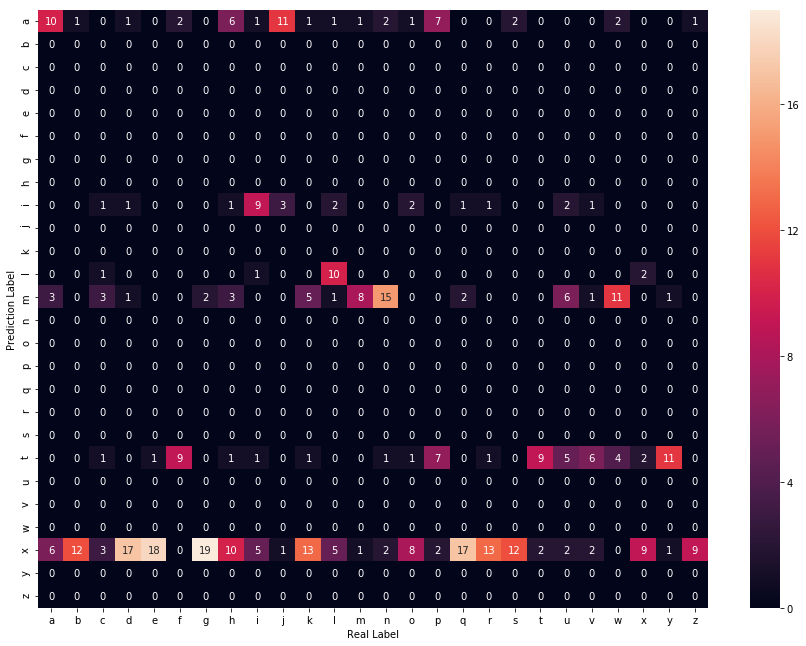

In [21]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "abcdefghijklmnopqrstuvwxyz"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz"])
plt.figure(figsize = (15,11))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [24]:
from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    

def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths



used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [43, 0, 0, 0, 0, 0, 21]


In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [26]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [43, 0, 0, 0, 0, 0, 21]


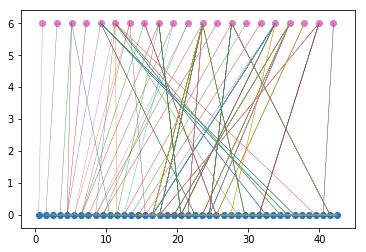

In [27]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()